# Mandar Sanjay Chaudhari
# 220968222
# Section B Batch B4
# Week 3
# Polynomial Regression
# Dataset : Wine Quality

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
wine_quality = fetch_ucirepo(id=186)

df=wine_quality.data.features

df2=wine_quality.data.targets

df3=df.join(df2['quality'])

df3

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Implementation using single feature
## Feature which has the highest correlation

<Axes: >

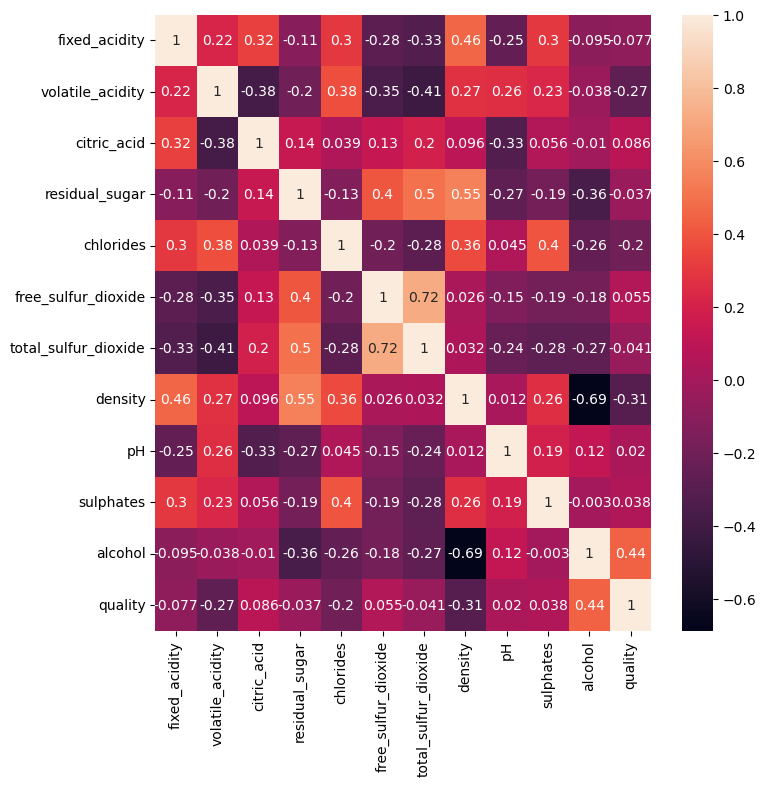

In [4]:
plt.figure(figsize=(8,8))

sns.heatmap(df3.corr(),annot=True)

In [5]:
x=df3[['alcohol']]

y=df2.quality

In [6]:
poly=PolynomialFeatures(degree=2, include_bias=False)

reg=LinearRegression()

xp=poly.fit_transform(x)

reg.fit(xp,y)

y_pred=reg.predict(xp)

y_pred

array([5.47613927, 5.58113101, 5.58113101, ..., 5.47613927, 6.6292928 ,
       6.22878324])

In [7]:
mse=mean_squared_error(y,y_pred)

r2=r2_score(y,y_pred)

mar=mean_absolute_error(y,y_pred)

print("Coefficients:",reg.coef_)

print("Intercept:",reg.intercept_)

print("Mean Squared Error:",mse)

print("Mean Absolute Error:",mar)

print("R-squared:",r2)

Coefficients: [-0.22829467  0.02556115]
Intercept: 5.363526157985927
Mean Squared Error: 0.6104165413638293
Mean Absolute Error: 0.6216511105761787
R-squared: 0.19940898382674876


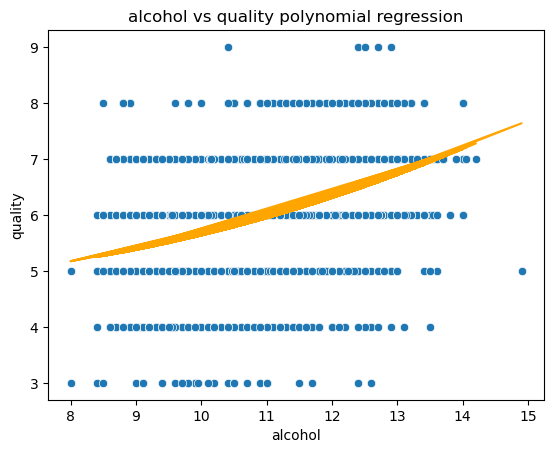

In [8]:
sns.scatterplot(x=df3.alcohol,y=y)

plt.plot(x,y_pred,color="orange")

plt.title("alcohol vs quality polynomial regression")

plt.show()

## Implementation using all features

In [9]:
x2=df

y2=df2.quality

In [10]:
poly=PolynomialFeatures(degree=2, include_bias=False)

xp=poly.fit_transform(x2)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(xp, y2, test_size=0.2, random_state=42)

In [12]:
reg=LinearRegression()

reg.fit(x_train,y_train)

y_pred=reg.predict(x_test)

y_pred

array([6.5958714 , 5.01974404, 6.51285664, ..., 6.82567618, 5.17614369,
       6.13785194])

In [13]:
mse=mean_squared_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)

mar=mean_absolute_error(y_test,y_pred)

print("Coefficients:",reg.coef_)
print("")

print("Intercept:",reg.intercept_)

print("Mean Squared Error:",mse)

print("Mean Absolute Error:",mar)

print("R-squared:",r2)

Coefficients: [-3.93219821e+01 -1.53440850e+02  2.76357876e+02 -2.64116202e+01
 -1.65319479e+03  1.73588081e+00  1.05913256e+00  2.76825249e+04
  2.26317941e+02 -2.99428425e+01  4.37500500e+01 -3.59522114e-02
 -1.29592216e-01  3.10016996e-01 -2.41358812e-02 -2.79778433e+00
  8.78849800e-04  4.58994296e-04  3.94285587e+01  1.43773753e-01
  1.39385134e-01  3.20675862e-02  4.91628219e-01  6.08099438e-01
 -1.70629089e-01  5.98822421e+00 -4.41348643e-03  7.46095981e-03
  1.48582860e+02 -5.60185104e-01  3.52695485e-01  5.87803469e-01
 -8.84471724e-01  8.03406160e-02  4.46616571e+00  1.20273013e-02
 -1.80915362e-04 -2.84903606e+02  1.47406153e+00 -1.38533801e-01
 -4.83662885e-02 -1.04186114e-02 -8.27937112e-01  4.24717719e-04
  5.23091842e-04  2.68566931e+01 -8.01205972e-02 -6.14967002e-02
  3.23486507e-02 -3.23850454e+00  3.49036696e-02 -2.71328101e-02
  1.72696624e+03 -1.54223912e+01 -9.51795821e+00  1.13252556e+00
 -2.06562989e-04 -2.30179048e-05 -1.75306688e+00  3.03108401e-03
  1.2067682